# sklearn.metrics使用大全
参考[官网资料](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)，[相关算法](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)。

In [1]:
# 导入相关的包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## classification_report

In [2]:
# 输出精确和召回
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")  # 忽略当某个类别某有预测到时出的警告

y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
labels=list(set(y_true))
print(classification_report(y_true, y_pred,labels=labels))

              precision    recall  f1-score   support

        bird       0.00      0.00      0.00         1
         ant       0.67      1.00      0.80         2
         cat       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.44      0.56      0.49         6
weighted avg       0.56      0.67      0.60         6



上表中的参数解释

|参数|解释|
| ------------ | ---- |
| precision          | 精确率 |
| recall         | 召回率 |
| f1-score          | f1 值 |
|    support          |    总数  |
| accuracy     |   准确率   |
| macro avg    | 宏平均 |
| weighted avg | 加权平均 |

In [3]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score

print(precision_score(y_true, y_pred, average=None, labels=labels))
print(recall_score(y_true, y_pred, average=None, labels=labels))
print(accuracy_score(y_true, y_pred))
print(f1_score(y_true, y_pred, average=None, labels=labels))


f1=f1_score(y_true, y_pred, average=None, labels=labels)
f1[0]

[0.         0.66666667 0.66666667]
[0.         1.         0.66666667]
0.6666666666666666
[0.         0.8        0.66666667]


0.0

Text(0.5, 1, 'Confusion matrix,without normalization')

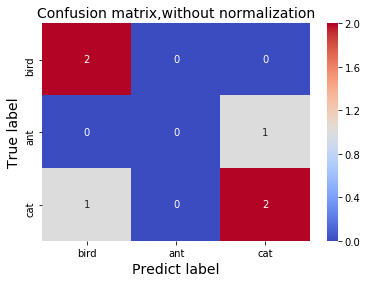

In [4]:
# 绘制混淆矩阵
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_true, y_pred)
df = pd.DataFrame(cm, columns=labels,index=labels)
sns.heatmap(df,annot=True,cmap="coolwarm")
plt.xlabel('Predict label', color='k', size=14) 
plt.ylabel('True label', color='k', size=14) 
plt.title('Confusion matrix,without normalization', color='k', size=14) 

其中参数 `cmap` 颜色模式如下
![](https://tva1.sinaimg.cn/large/007S8ZIlly1gfpignsgybj30l20jfk0w.jpg)

## accuracy_score

In [5]:
# 输出准确率
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")  # 忽略当某个类别某有预测到时出的警告

y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
labels=list(set(y_true))

print("准确率", accuracy_score(y_true, y_pred))

准确率 0.6666666666666666


## roc_auc_score

In [6]:
from sklearn.metrics import roc_auc_score

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

## roc_curve

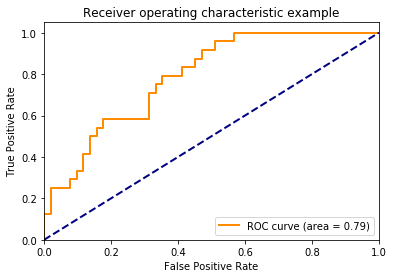

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute the prob
y_prob = classifier.predict_proba(X_test)
#print(y_prob)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 几个回归的函数

In [8]:
from sklearn.metrics import explained_variance_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
explained_variance_score(y_true, y_pred)  

0.9571734475374732

In [9]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

In [10]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [11]:
 from sklearn.metrics import r2_score
 y_true = [3, -0.5, 2, 7]
 y_pred = [2.5, 0.0, 2, 8]
 r2_score(y_true, y_pred)  

0.9486081370449679